## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
#建立你的神經網路
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out]) 
    return model

In [6]:
#設定超參數
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.75

In [7]:
results = {}
#撰寫你的訓練流程並將結果用 dictionary 紀錄
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 21s 417us/step - loss: 0.9470 - accuracy: 0.6606 - val_loss: 1.7766 - val_accuracy: 0.4854
Epoch 49/50
50000/50000 [==============================] - 20s 409us/step - loss: 0.9482 - accuracy: 0.6590 - val_loss: 1.6730 - val_accuracy: 0.4980
Epoch 50/50
50000/50000 [==============================] - 21s 414us/step - loss: 0.9350 - accuracy: 0.6663 - val_loss: 1.7193 - val_accuracy: 0.5069
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 20s 394us/step - loss: 0.6456 - accuracy: 0.7703 - val_loss: 1.5799 - val_accuracy: 0.5364
Epoch 46/50
50000/50000 [==============================] - 20s 397us/step - loss: 0.6303 - accuracy: 0.7765 - val_loss: 1.5827 - val_accuracy: 0.5323
Epoch 47/50
50000/50000 [==============================] - 20s 406us/step - loss: 0.6172 - accuracy: 0.7807 - val_loss: 1.5674 - val_accuracy: 0.5379
Epoch 48/50
50000/50000 [==============================] - 20s 407us/step - loss: 0.5972 - accuracy: 0.7887 - val_loss: 1.6243 - val_accuracy: 0.5250
Epoch 49/50
50000/50000 [==============================] - 20s 403us/step - loss: 0.5852 - accuracy: 0.7946 - val_loss: 1.7017 - val_accuracy: 0.5181
Epoch 50/50
50000/50000 [==============================] - 21s 411us/step - loss: 0.5695 - accuracy: 0.7993 - val_loss: 1.6223 - val_accuracy: 0.5367
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 20s 397us/step - loss: 1.2687 - accuracy: 0.5539 - val_loss: 1.3957 - val_accuracy: 0.5022
Epoch 43/50
50000/50000 [==============================] - 20s 399us/step - loss: 1.2633 - accuracy: 0.5558 - val_loss: 1.3829 - val_accuracy: 0.5071
Epoch 44/50
50000/50000 [==============================] - 20s 399us/step - loss: 1.2582 - accuracy: 0.5567 - val_loss: 1.3586 - val_accuracy: 0.5231
Epoch 45/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.2486 - accuracy: 0.5621 - val_loss: 1.3761 - val_accuracy: 0.5114
Epoch 46/50
50000/50000 [==============================] - 20s 399us/step - loss: 1.2436 - accuracy: 0.5625 - val_loss: 1.3526 - val_accuracy: 0.5217
Epoch 47/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.2324 - accuracy: 0.5659 - val_loss: 1.3534 - val_accuracy: 0.5237
Epoch 48/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.2271 - accuracy: 0.5684 - va

50000/50000 [==============================] - 20s 400us/step - loss: 1.7767 - accuracy: 0.3814 - val_loss: 1.7774 - val_accuracy: 0.3814
Epoch 40/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.7729 - accuracy: 0.3835 - val_loss: 1.7739 - val_accuracy: 0.3824
Epoch 41/50
50000/50000 [==============================] - 20s 396us/step - loss: 1.7692 - accuracy: 0.3848 - val_loss: 1.7700 - val_accuracy: 0.3854
Epoch 42/50
50000/50000 [==============================] - 20s 392us/step - loss: 1.7655 - accuracy: 0.3856 - val_loss: 1.7667 - val_accuracy: 0.3860
Epoch 43/50
50000/50000 [==============================] - 21s 419us/step - loss: 1.7618 - accuracy: 0.3868 - val_loss: 1.7640 - val_accuracy: 0.3874
Epoch 44/50
50000/50000 [==============================] - 22s 431us/step - loss: 1.7584 - accuracy: 0.3882 - val_loss: 1.7594 - val_accuracy: 0.3895
Epoch 45/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.7550 - accuracy: 0.3889 - va

50000/50000 [==============================] - 19s 376us/step - loss: 2.1232 - accuracy: 0.2424 - val_loss: 2.1214 - val_accuracy: 0.2413
Epoch 37/50
50000/50000 [==============================] - 19s 374us/step - loss: 2.1198 - accuracy: 0.2452 - val_loss: 2.1180 - val_accuracy: 0.2440
Epoch 38/50
50000/50000 [==============================] - 19s 375us/step - loss: 2.1164 - accuracy: 0.2472 - val_loss: 2.1146 - val_accuracy: 0.2446
Epoch 39/50
50000/50000 [==============================] - 19s 377us/step - loss: 2.1131 - accuracy: 0.2489 - val_loss: 2.1113 - val_accuracy: 0.2464
Epoch 40/50
50000/50000 [==============================] - 19s 375us/step - loss: 2.1098 - accuracy: 0.2502 - val_loss: 2.1080 - val_accuracy: 0.2476
Epoch 41/50
50000/50000 [==============================] - 19s 378us/step - loss: 2.1065 - accuracy: 0.2524 - val_loss: 2.1048 - val_accuracy: 0.2499
Epoch 42/50
50000/50000 [==============================] - 19s 377us/step - loss: 2.1033 - accuracy: 0.2545 - va

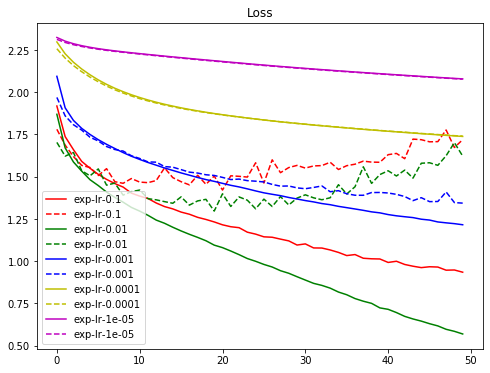

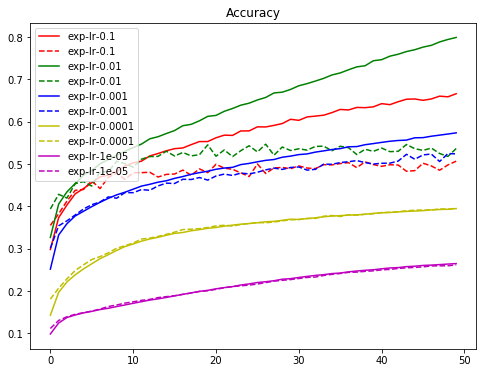

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
#將結果繪出
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()